# Metallicity distribution raw SFH data

In [1]:
from hoki.constants import *
from scipy.special import gammainc
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
import h5py


In [11]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

path = "../data/"

In [72]:
data = h5py.File(f"{path}/data.h5", "r")

In [57]:
SFR = data['SFR_metallicity_dist']

<ipython-input-71-42382f53eae9>:85: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pos = axes[1,1].pcolor(emp_edges, emp.attrs['metallicity_edges'], emp['distribution'][:].T, norm=mpl.colors.LogNorm(vmin=1e-6, vmax=1e-2), shading='auto', cmap=plt.get_cmap("Blues"))


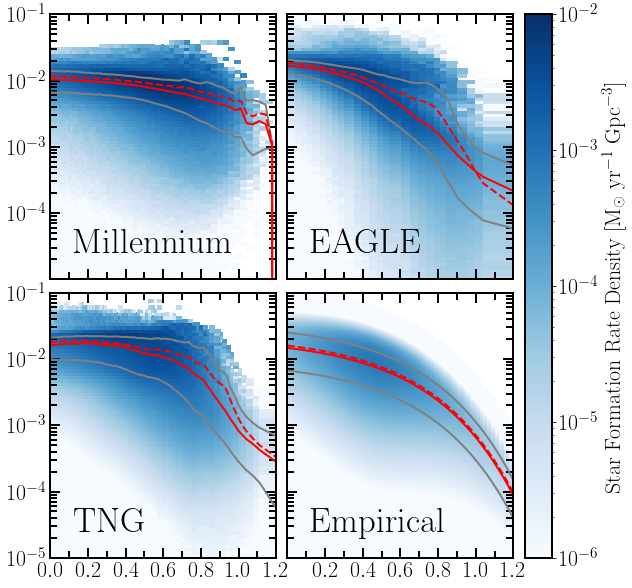

In [71]:
#fig =  plt.figure(figsize=(10,10))
fig, axes = plt.subplots(2,2, figsize=(10,10))


fig.subplots_adjust(hspace=0.05, wspace=0.05)
# vmin and vmax are necessary to make the colorbars the same for each plot

# Set the minor and major ticks on both axes
axes[0,0].xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
axes[0,0].xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
axes[0,0].yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
axes[0,0].yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
axes[0,0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
axes[0,0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

axes[1,0].xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
axes[1,0].xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
axes[1,0].yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
axes[1,0].yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
axes[1,0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
axes[1,0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))


axes[0,1].xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
axes[0,1].xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
axes[0,1].yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
axes[0,1].yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
axes[0,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
axes[0,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))


axes[1,1].xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
axes[1,1].xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
axes[1,1].yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
axes[1,1].yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
axes[1,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
axes[1,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

# Millimillennium
MM = SFR['millimillennium']
MM_edges = np.log10(1+MM.attrs['redshift'])
pos = axes[0,0].pcolor(MM_edges, MM.attrs['metallicity_edges'] , MM['distribution'][:].T, norm=mpl.colors.LogNorm(vmin=1e-6, vmax=1e-2),cmap=plt.get_cmap("Blues"))
axes[0,0].plot(MM_edges[:-1], MM['16p'][:], color="grey", lw=2)
axes[0,0].plot(MM_edges[:-1], MM['84p'][:], color="grey", lw=2)
axes[0,0].plot(MM_edges[:-1], MM['median'][:], color="red", lw=2)
axes[0,0].plot(MM_edges[:-1], MM['mean'][:], color="red", ls="--", lw=2)
axes[0,0].text(0.1,0.1, "Millennium", transform=axes[0,0].transAxes, fontsize=35)

x_upper = 1.2
axes[0,0].set_yscale('log')
axes[0,0].set_xlim(0,x_upper)
axes[0,0].set_ylim(1.0001e-5, 1e-1)
axes[0,1].set_yscale('log')
axes[0,1].set_xlim(0,x_upper)
axes[0,1].set_ylim(1e-5, 1e-1)
axes[1,0].set_yscale('log')
axes[1,0].set_xlim(0,x_upper)
axes[1,0].set_ylim(1e-5, 1e-1)
axes[1,1].set_yscale('log')
axes[1,1].set_xlim(0.00001,x_upper)
axes[1,1].set_ylim(1e-5, 1e-1)


EAGLE = SFR['EAGLE']
EAGLE_edges = np.log10(1+EAGLE.attrs['redshift'])
pos = axes[0,1].pcolor(EAGLE_edges, EAGLE.attrs['metallicity_edges'], EAGLE['distribution'][:].T, norm=mpl.colors.LogNorm(vmin=1e-6, vmax=1e-2),cmap=plt.get_cmap("Blues"))
axes[0,1].plot(EAGLE_edges[:-1], EAGLE['16p'][:], color="grey", lw=2)
axes[0,1].plot(EAGLE_edges[:-1], EAGLE['84p'][:], color="grey", lw=2)
axes[0,1].plot(EAGLE_edges[:-1], EAGLE['median'][:], color="red", lw=2)
axes[0,1].plot(EAGLE_edges[:-1], EAGLE['mean'][:], color="red", ls="--", lw=2)
axes[0,1].text(0.1,0.1, "EAGLE", transform=axes[0,1].transAxes, fontsize=35)

TNG = SFR['TNG']
TNG_edges = np.log10(1+TNG.attrs['redshift'])
pos = axes[1,0].pcolor(TNG_edges, TNG.attrs['metallicity_edges'], TNG['distribution'][:].T, norm=mpl.colors.LogNorm(vmin=1e-6, vmax=1e-2),cmap=plt.get_cmap("Blues"))
axes[1,0].plot(TNG_edges[:-1], TNG['16p'][:], color="grey", lw=2)
axes[1,0].plot(TNG_edges[:-1], TNG['84p'][:], color="grey", lw=2)
axes[1,0].plot(TNG_edges[:-1], TNG['median'][:], color="red", lw=2)
axes[1,0].plot(TNG_edges[:-1], TNG['mean'][:], color="red", ls="--", lw=2)
axes[1,0].text(0.1,0.1, "TNG", transform=axes[1,0].transAxes, fontsize=35)
#fig.colorbar(pos, ax=axes[1,0])

emp = SFR['empirical']
emp_edges = np.log10(1+emp.attrs['redshift'])
pos = axes[1,1].pcolor(emp_edges, emp.attrs['metallicity_edges'], emp['distribution'][:].T, norm=mpl.colors.LogNorm(vmin=1e-6, vmax=1e-2), shading='auto', cmap=plt.get_cmap("Blues"))
axes[1,1].plot(emp_edges, emp['16p'][:], color="grey", lw=2)
axes[1,1].plot(emp_edges, emp['84p'][:], color="grey", lw=2)
axes[1,1].plot(emp_edges, emp['median'][:], color="red", lw=2)
axes[1,1].plot(emp_edges, emp['mean'][:], color="red", ls="--", lw=2)

axes[1,1].text(0.1,0.1, "Empirical", transform=axes[1,1].transAxes, fontsize=35)
#axes[1,1].set_xticks(minor=False, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
#axes[1,1].set_xticks(minor=True, ticks=[0.1, 0.3, 0.5, 0.7, 0.9])
#axes[1,1].set_xticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1"])
cbar = fig.colorbar(pos, ax=axes.flatten(), pad=0.02)
cbar.ax.set_ylabel(r"Star Formation Rate Density [M$_\odot$ yr$^{-1}$ Gpc$^{-3}$]")

# fig.text(0.44, 0.07, r'log$_{10}$(1+$z$)', ha='center', va='center')
# fig.text(0.05, 0.5, 'Metallicity', ha='center', va='center', rotation='vertical')

# # Remove tick labels for a clearer image
# #top left
axes[0,0].xaxis.set_ticklabels([])

# #top right
axes[0,1].xaxis.set_ticklabels([])
axes[0,1].yaxis.set_ticklabels([])

# # bottom right
axes[1,1].yaxis.set_ticklabels([])

#plt.show()
plt.savefig("images/pdf/metal_dist.pdf")
plt.savefig("images/png/metal_dist.png", dpi=300)

In [ ]:
data.close()